In [326]:
import sys
sys.path.append('..')
from utils.alignment import align, load_align_model
from speech_utils import load_audio, SAMPLE_RATE
import IPython.display as ipd
from tqdm import tqdm
import torch
from utils.segment_types import SingleSegment, TranscriptionResult
import re
import numpy as np
from datasets import load_from_disk
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from pathlib import Path
import torchaudio.functional as F
import IPython

ds = load_from_disk('/mnt/sea/speech/ds_filtered/shrutilipi_pa_ASR_filtered')
ds = ds['train']
print(ds)

def show_example(i):
    print(ds[i][0].segments[0].text)
    audio = ds[i]['audio']['array']
    ipd.display(ipd.Audio(audio, rate=SAMPLE_RATE))

print(ds[0])

align_language = 'pa'
device = torch.device('cuda')
align_model = 'kdcyberdude/w2v-bert-punjabi'
interpolate_method = 'ignore' # choices=["nearest", "linear", "ignore"]
return_char_alignments = False
print_progress = False

results = []
align_model, align_metadata, processor = load_align_model(align_language, device, model_name=align_model)

def get_alignments(start, end, text, audio):
    ss = SingleSegment(start=start,end=end,text=text)
    result = align([ss], align_model, processor, align_metadata, audio, device, interpolate_method=interpolate_method, return_char_alignments=return_char_alignments, print_progress=print_progress)
    return result


results = []
for i in tqdm(range(1)):
    audio_start = 0.0
    audio_end = ds[i]['duration']
    text = ds[i]['text']
    audio = ds[i]['audio']['array']
    result = get_alignments(audio_start, audio_end, text, audio)
    results.append(result)

print(len(results))

Loading dataset from disk:   0%|          | 0/17 [00:00<?, ?it/s]

Dataset({
    features: ['audio', 'text', 'gender', 'speaker_id', 'duration'],
    num_rows: 27991
})
{'audio': {'path': None, 'array': array([0., 0., 0., ..., 0., 0., 0.]), 'sampling_rate': 16000}, 'text': 'ਸੂਚਨਾ ਤੇ ਪ੍ਰਸਾਰਣ ਮੰਤਰਾਲੇ ਦੇ ਚੰਡੀਗੜ੍ਹ ਖੇਤਰ ਦੀ ਐਡੀਸ਼ਨਲ ਮਹਾਂਨਿਦੇਸ਼ਕ ਸ੍ਰੀਮਤੀ ਦੇਵਪ੍ਰੀਤ ਸਿੰਘ ਨੇ ਵੈਬੀਨਾਰ ਨੂੰ ਸੰਬੋਧਨ ਕਰਦਿਆਂ ਕਿਹਾ ਕਿ ਨਵੇਂ ਖੇਤੀ ਕਾਨੂੰਨਾਂ ਫਸਲੀ ਵਿਭਿੰਨਤਾ ਅਤੇ ਚੰਗੀ ਕੀਮਤ ਲਈ ਕਿਸਾਨਾਂ ਦੀ ਮਦਦ ਕਰਨਗੇ', 'gender': None, 'speaker_id': None, 'duration': 12.42}


In [329]:
results[0]['word_segments']

[{'word': 'ਸੂਚਨਾ', 'start': 15917.287, 'end': 71627.793, 'score': 0.8},
 {'word': 'ਤੇ', 'start': 87545.081, 'end': 111421.012, 'score': 0.95},
 {'word': 'ਪ੍ਰਸਾਰਣ', 'start': 119379.656, 'end': 206924.737, 'score': 0.784},
 {'word': 'ਮੰਤਰਾਲੇ', 'start': 214883.38, 'end': 294469.817, 'score': 0.856},
 {'word': 'ਦੇ', 'start': 302428.461, 'end': 326304.392, 'score': 1.0},
 {'word': 'ਚੰਡੀਗੜ੍ਹ', 'start': 350180.323, 'end': 437725.404, 'score': 0.875},
 {'word': 'ਖੇਤਰ', 'start': 445684.048, 'end': 493435.91, 'score': 0.75},
 {'word': 'ਦੀ', 'start': 509353.198, 'end': 525270.485, 'score': 0.995},
 {'word': 'ਐਡੀਸ਼ਨਲ', 'start': 541187.773, 'end': 628732.853, 'score': 0.642},
 {'word': 'ਮਹਾਂਨਿਦੇਸ਼ਕ',
  'start': 636691.497,
  'end': 819740.303,
  'score': 0.578},
 {'word': 'ਸ੍ਰੀਮਤੀ', 'start': 835657.59, 'end': 931161.315, 'score': 0.634},
 {'word': 'ਦੇਵਪ੍ਰੀਤ', 'start': 947078.602, 'end': 1042582.327, 'score': 0.781},
 {'word': 'ਸਿੰਘ', 'start': 1050540.97, 'end': 1090334.189, 'score': 0.889},
 {'word

In [330]:
font_path = './AnmolUni.ttf'  
font_path = Path(font_path)
prop = FontProperties(fname=font_path)
plt.rcParams['font.family'] = ["Ubuntu", prop.get_name()]

print(ds[0]['text'])
probs = [x['score'] for x in results[0]['word_segments']]
min(probs), max(probs), sum(probs)/len(probs)

(0.447, 1.0, 0.8077575757575757)

In [336]:
# get a small sample for testing and visualization
sample = None
for i in range(1000):
    if ds[i]['duration'] < 5:
        sample = ds[i]
        break

sample

{'audio': {'path': None,
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 16000},
 'text': 'ਜ਼ਖ਼ਮੀਆਂ ਨੂੰ ਇਲਾਜ ਲਈ ਹਸਪਤਾਲ ਦਾਖਲ ਕਰਾਇਆ ਗਿਆ',
 'gender': None,
 'speaker_id': None,
 'duration': 2.38}

In [337]:

audio = sample['audio']['array']

t = sample['text']
t = '* ਲੋਕ * ਆਪਣੇ * ਵਿਚਾਰ * ਨਮੋ * ਐਪ * ਜਾਂ * ਮਾਈ * ਜੀ * ਓ * ਵੀ * ਓਪਨ * ਫੋਰਮ * ਤੇ * ਸਾਂਝੇ * ਕਰ * ਸਕਦੇ * ਨੇ *'
t = re.sub(r'\s+', ' ', t)
t = t.strip()
transcript = t.split()
text = t.replace(' ', '')
print(t)
audio = torch.from_numpy(audio)
duration = audio.shape[0]/SAMPLE_RATE

with torch.no_grad():
    input_features = processor(audio, sampling_rate=16000).input_features[0]
    input_features = torch.tensor(input_features).to(device).unsqueeze(0)
    emissions = align_model(input_features).logits
    emissions = torch.log_softmax(emissions, dim=-1)


print(emissions.shape)

* ਲੋਕ * ਆਪਣੇ * ਵਿਚਾਰ * ਨਮੋ * ਐਪ * ਜਾਂ * ਮਾਈ * ਜੀ * ਓ * ਵੀ * ਓਪਨ * ਫੋਰਮ * ਤੇ * ਸਾਂਝੇ * ਕਰ * ਸਕਦੇ * ਨੇ *
torch.Size([1, 144, 69])


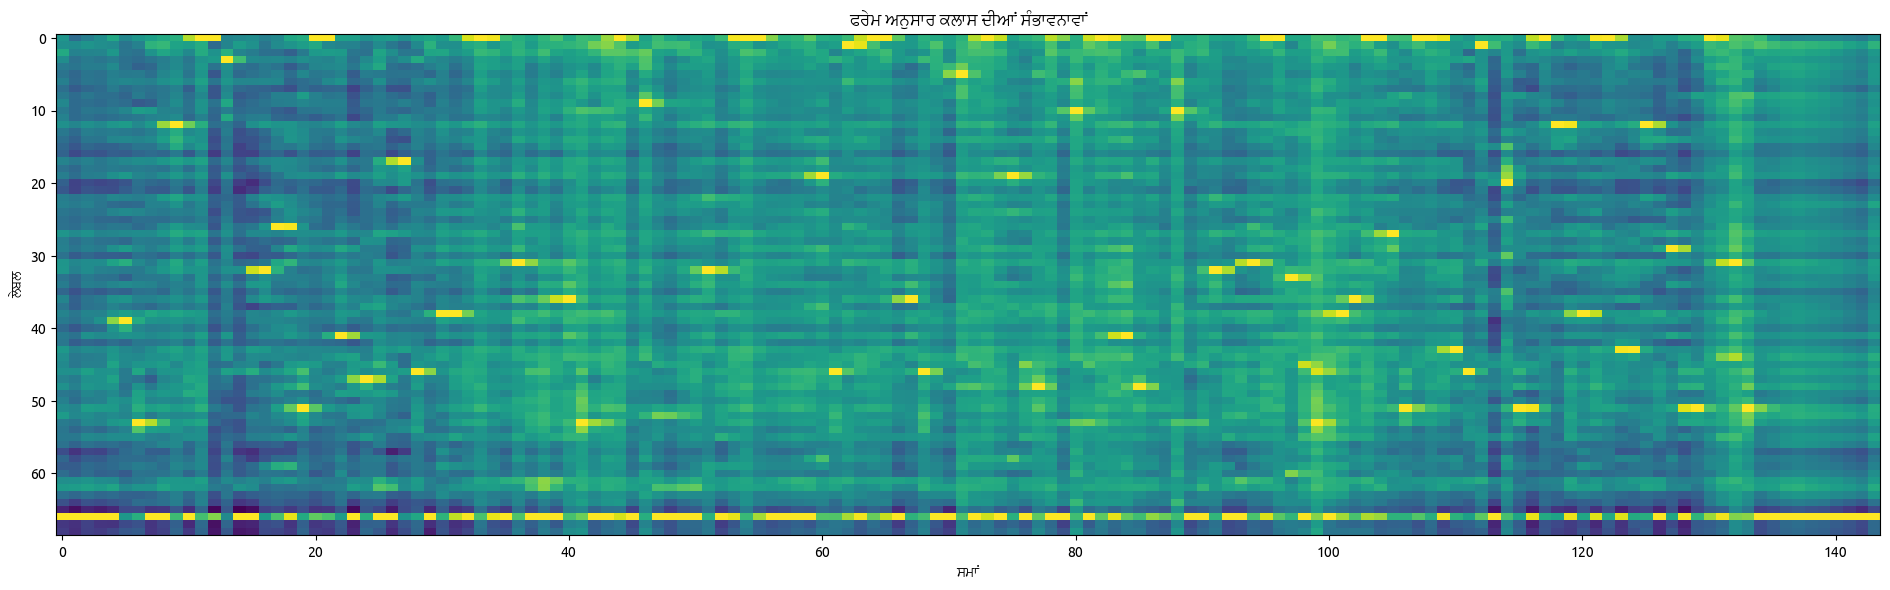

{'[PAD]': 66, '[UNK]': 65, '|': 0, 'ਂ': 1, 'ਅ': 2, 'ਆ': 3, 'ਇ': 4, 'ਈ': 5, 'ਉ': 6, 'ਊ': 7, 'ਏ': 8, 'ਐ': 9, 'ਓ': 10, 'ਔ': 11, 'ਕ': 12, 'ਖ': 13, 'ਗ': 14, 'ਘ': 15, 'ਙ': 16, 'ਚ': 17, 'ਛ': 18, 'ਜ': 19, 'ਝ': 20, 'ਞ': 21, 'ਟ': 22, 'ਠ': 23, 'ਡ': 24, 'ਢ': 25, 'ਣ': 26, 'ਤ': 27, 'ਥ': 28, 'ਦ': 29, 'ਧ': 30, 'ਨ': 31, 'ਪ': 32, 'ਫ': 33, 'ਬ': 34, 'ਭ': 35, 'ਮ': 36, 'ਯ': 37, 'ਰ': 38, 'ਲ': 39, 'ਲ਼': 40, 'ਵ': 41, 'ਸ਼': 42, 'ਸ': 43, 'ਹ': 44, '਼': 45, 'ਾ': 46, 'ਿ': 47, 'ੀ': 48, 'ੁ': 49, 'ੂ': 50, 'ੇ': 51, 'ੈ': 52, 'ੋ': 53, 'ੌ': 54, '੍': 55, 'ਖ਼': 56, 'ਗ਼': 57, 'ਜ਼': 58, 'ੜ': 59, 'ਫ਼': 60, 'ੰ': 61, 'ੱ': 62, 'ੲ': 63, 'ੳ': 64, '<s>': 67, '</s>': 68}

torch.Size([1, 144, 69])
torch.Size([1, 144, 69])
torch.Size([1, 144, 70])
{66: '[PAD]', 65: '[UNK]', 0: '|', 1: 'ਂ', 2: 'ਅ', 3: 'ਆ', 4: 'ਇ', 5: 'ਈ', 6: 'ਉ', 7: 'ਊ', 8: 'ਏ', 9: 'ਐ', 10: 'ਓ', 11: 'ਔ', 12: 'ਕ', 13: 'ਖ', 14: 'ਗ', 15: 'ਘ', 16: 'ਙ', 17: 'ਚ', 18: 'ਛ', 19: 'ਜ', 20: 'ਝ', 21: 'ਞ', 22: 'ਟ', 23: 'ਠ', 24: 'ਡ', 25: 'ਢ', 26: 'ਣ', 27: 'ਤ', 28: 'ਥ', 29: 'ਦ', 30: 'ਧ', 31:

In [338]:

notebook_width = 190 
fig_width = notebook_width / 10 
fig_height = 6

def plot_emission(emission): 
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    ax.imshow(emission.cpu().T, aspect='auto')  
    ax.set_title("ਫਰੇਮ ਅਨੁਸਾਰ ਕਲਾਸ ਦੀਆਂ ਸੰਭਾਵਨਾਵਾਂ")
    ax.set_xlabel("ਸਮਾਂ")
    ax.set_ylabel("ਲੇਬਲ")
    fig.tight_layout()

    plt.show()

plot_emission(emissions[0])
dictionary = processor.tokenizer.get_vocab()
dictionary["*"] = len(dictionary)

star_dim = torch.zeros((1, emissions.size(1), 1), device=emissions.device, dtype=emissions.dtype)
emission = torch.cat((emissions, star_dim), 2)
assert len(dictionary) == emission.shape[2]

labels = {}
for k, v in dictionary.items():
    labels[v] = k


In [341]:
tokenized_transcript = processor.tokenizer.tokenize(text)
transcript_ids = processor.tokenizer.encode(text)

68
[65, 39, 53, 12, 65, 3, 32, 26, 51, 65, 41, 47, 17, 46, 38, 65, 31, 36, 53, 65, 9, 32, 65, 19, 46, 1, 65, 36, 46, 5, 65, 19, 48, 65, 10, 65, 41, 48, 65, 10, 32, 31, 65, 33, 53, 38, 36, 65, 27, 51, 65, 43, 46, 1, 20, 51, 65, 12, 38, 65, 43, 12, 29, 51, 65, 31, 51, 65]


In [342]:
text, len(text)

('*ਲੋਕ*ਆਪਣੇ*ਵਿਚਾਰ*ਨਮੋ*ਐਪ*ਜਾਂ*ਮਾਈ*ਜੀ*ਓ*ਵੀ*ਓਪਨ*ਫੋਰਮ*ਤੇ*ਸਾਂਝੇ*ਕਰ*ਸਕਦੇ*ਨੇ*', 68)

In [343]:
print(emission.shape)

torch.Size([1, 144, 70])


In [344]:

# plot_emission(emission[0])
tokenized_transcript = processor.tokenizer.tokenize(text)
# transcript_ids = processor.tokenizer.encode(text)
transcript_ids = [dictionary[x] for word in transcript for x in word]
# processor.tokenizer.decode(transcript_ids)

def align(emission, tokens):
    targets = torch.tensor([tokens], dtype=torch.int32, device=device)
    alignments, scores = F.forced_align(emission, targets, blank=0)

    alignments, scores = alignments[0], scores[0]  # remove batch dimension for simplicity
    scores = scores.exp()  # convert back to probability
    return alignments, scores

aligned_tokens, alignment_scores = align(emission, transcript_ids)

['*', 'ਲ', 'ੋ', 'ਕ', '*', 'ਆ', 'ਪ', 'ਣ', 'ੇ', '*', 'ਵ', 'ਿ', 'ਚ', 'ਾ', 'ਰ', '*', 'ਨ', 'ਮ', 'ੋ', '*', 'ਐ', 'ਪ', '*', 'ਜ', 'ਾ', 'ਂ', '*', 'ਮ', 'ਾ', 'ਈ', '*', 'ਜ', 'ੀ', '*', 'ਓ', '*', 'ਵ', 'ੀ', '*', 'ਓ', 'ਪ', 'ਨ', '*', 'ਫ', 'ੋ', 'ਰ', 'ਮ', '*', 'ਤ', 'ੇ', '*', 'ਸ', 'ਾ', 'ਂ', 'ਝ', 'ੇ', '*', 'ਕ', 'ਰ', '*', 'ਸ', 'ਕ', 'ਦ', 'ੇ', '*', 'ਨ', 'ੇ', '*']
torch.Size([1, 144, 70]) torch.Size([1, 68])


In [346]:
# for i, (ali, score) in enumerate(zip(aligned_tokens, alignment_scores)):
#     print(f"{i:3d}:\t{ali:2d} [{labels[ali.item()]}], {score:.2f}")

In [347]:
token_spans = F.merge_tokens(aligned_tokens, alignment_scores)

# print("Token\tTime\t\tScore")
# for s in token_spans:
#     print(f"{labels[s.token]}\t[{s.start:3d}, {s.end:3d})\t{s.score:.2f}")

In [348]:

def unflatten(list_, lengths):
    assert len(list_) == sum(lengths)
    i = 0
    ret = []
    for l in lengths:
        ret.append(list_[i : i + l])
        i += l
    return ret

word_spans = unflatten(token_spans, [len(word) for word in t.split()])

def _score(spans):
    return sum(s.score * len(s) for s in spans) / sum(len(s) for s in spans)


def preview_word(waveform, spans, num_frames, transcript, sample_rate=16000):
    ratio = waveform.size(1) / num_frames
    x0 = int(ratio * spans[0].start)
    x1 = int(ratio * spans[-1].end)
    print(f"{transcript} ({_score(spans):.2f}): {x0 / sample_rate:.3f} - {x1 / sample_rate:.3f} sec | {(x1 - x0) / sample_rate} duration")
    segment = waveform[:, x0:x1]
    display(IPython.display.Audio(segment.numpy(), rate=sample_rate))


num_frames = emissions.size(1)

In [349]:
word_spans

[[TokenSpan(token=69, start=0, end=5, score=1.0)],
 [TokenSpan(token=39, start=5, end=6, score=0.999961256980896),
  TokenSpan(token=53, start=6, end=8, score=0.5158538818359375),
  TokenSpan(token=12, start=8, end=9, score=0.00973463337868452)],
 [TokenSpan(token=69, start=9, end=14, score=1.0)],
 [TokenSpan(token=3, start=14, end=15, score=8.586692274548113e-05),
  TokenSpan(token=32, start=15, end=17, score=0.5504482388496399),
  TokenSpan(token=26, start=17, end=19, score=0.8470293283462524),
  TokenSpan(token=51, start=19, end=20, score=0.9997439980506897)],
 [TokenSpan(token=69, start=20, end=23, score=1.0)],
 [TokenSpan(token=41, start=23, end=24, score=0.013329187408089638),
  TokenSpan(token=47, start=24, end=26, score=0.5110915899276733),
  TokenSpan(token=17, start=26, end=28, score=0.5155858397483826),
  TokenSpan(token=46, start=28, end=30, score=0.5025392174720764),
  TokenSpan(token=38, start=30, end=31, score=0.9999421238899231)],
 [TokenSpan(token=69, start=31, end=39,

In [351]:
print(t)
IPython.display.Audio(audio, rate=16000)

* ਲੋਕ * ਆਪਣੇ * ਵਿਚਾਰ * ਨਮੋ * ਐਪ * ਜਾਂ * ਮਾਈ * ਜੀ * ਓ * ਵੀ * ਓਪਨ * ਫੋਰਮ * ਤੇ * ਸਾਂਝੇ * ਕਰ * ਸਕਦੇ * ਨੇ *


In [352]:
audio = audio.unsqueeze(0)

In [354]:
# for i in range(len(transcript)):
#     preview_word(audio, word_spans[i], num_frames, transcript[i])


/home/kd/anaconda3/envs/ai4bharat/lib/python3.12/site-packages/matplotlib/axes/_axes.py:7947: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


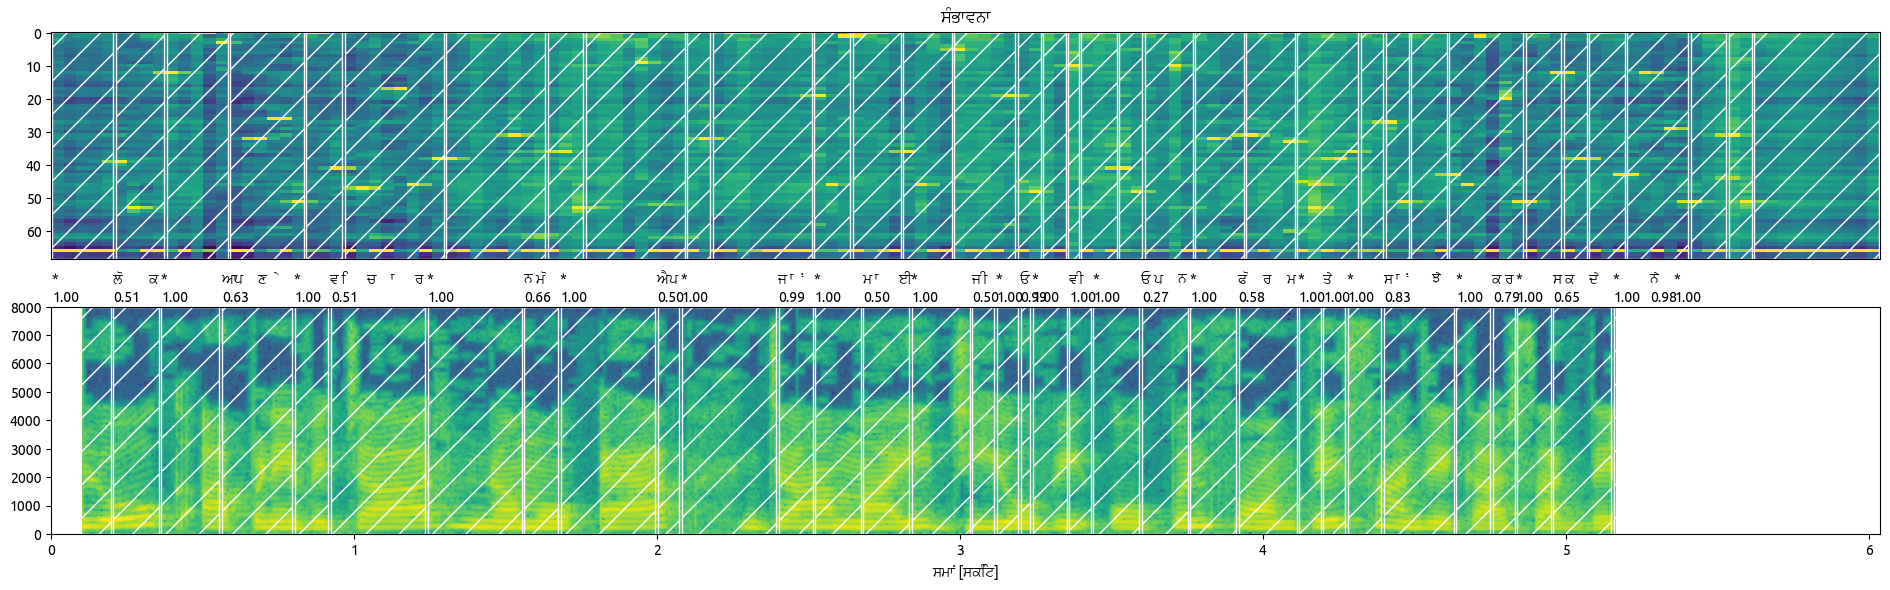

In [355]:
def plot_alignments(waveform, token_spans, emission, transcript, sample_rate=16000):
    ratio = waveform.size(1) / emission.size(1) / sample_rate

    fig, axes = plt.subplots(2, 1, figsize=(fig_width, fig_height))
    axes[0].imshow(emission[0].detach().cpu().T, aspect="auto")
    axes[0].set_title("ਸੰਭਾਵਨਾ")
    axes[0].set_xticks([])

    axes[1].specgram(waveform[0], Fs=sample_rate)
    for t_spans, chars in zip(token_spans, transcript):
        t0, t1 = t_spans[0].start + 0.1, t_spans[-1].end - 0.1
        axes[0].axvspan(t0 - 0.5, t1 - 0.5, facecolor="None", hatch="/", edgecolor="white")
        axes[1].axvspan(ratio * t0, ratio * t1, facecolor="None", hatch="/", edgecolor="white")
        axes[1].annotate(f"{_score(t_spans):.2f}", (ratio * t0, sample_rate * 0.51), annotation_clip=False)

        for span, char in zip(t_spans, chars):
            t0 = span.start * ratio
            axes[1].annotate(char, (t0, sample_rate * 0.55), annotation_clip=False)

    axes[1].set_xlabel("ਸਮਾਂ [ਸਕਿੰਟ]")
    axes[1].set_xlim([0, None])
    fig.tight_layout()

plot_alignments(audio, word_spans, emissions, transcript)

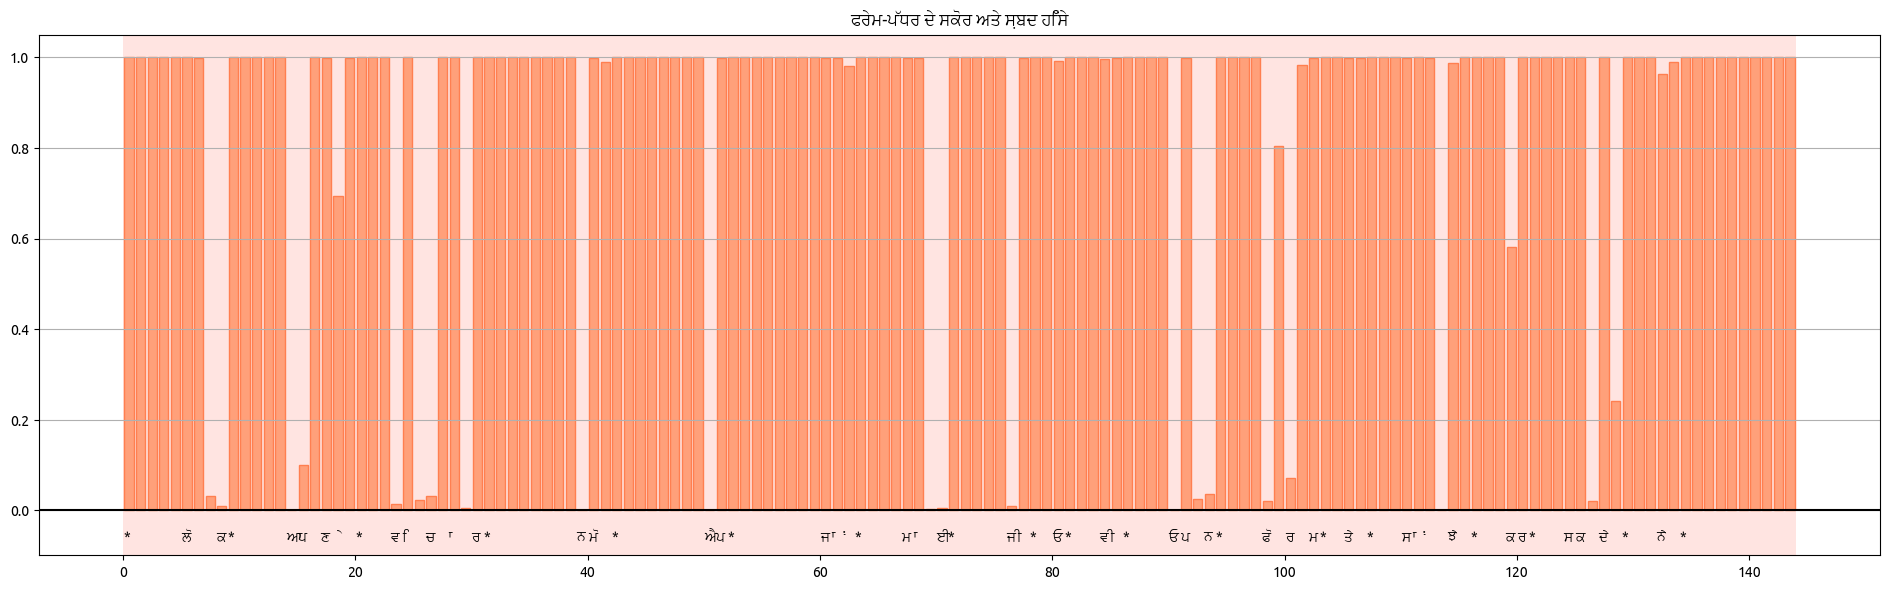

In [357]:
def plot_scores(word_spans, scores):
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    span_xs, span_hs = [], []
    ax.axvspan(word_spans[0][0].start - 0.05, word_spans[-1][-1].end + 0.05, facecolor="paleturquoise", edgecolor="none", zorder=-1)
    for t_span in word_spans:
        for span in t_span:
            for t in range(span.start, span.end):
                span_xs.append(t + 0.5)
                span_hs.append(scores[t].item())
            ax.annotate(labels[span.token], (span.start, -0.07))
        ax.axvspan(t_span[0].start - 0.05, t_span[-1].end + 0.05, facecolor="mistyrose", edgecolor="none", zorder=-1)
    ax.bar(span_xs, span_hs, color="lightsalmon", edgecolor="coral")
    ax.set_title("ਫਰੇਮ-ਪੱਧਰ ਦੇ ਸਕੋਰ ਅਤੇ ਸ਼ਬਦ ਹਿੱਸੇ")
    ax.set_ylim(-0.1, None)
    ax.grid(True, axis="y")
    ax.axhline(0, color="black")
    fig.tight_layout()


plot_scores(word_spans, alignment_scores)